In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [8]:
def Forecast(ARIMA_model, periods=48):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    # index_of_fc = pd.date_range(dataFrame.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='H')
    index_of_fc = pd.date_range(dataFrame.index[-1] + pd.DateOffset(hours=1), periods = n_periods, freq="H")
    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    return [fitted_series, lower_series, upper_series]

In [29]:
def AutoArima(x):
    return auto_arima(x, d=None, test = 'adf', D=1, m=24,
                        seasonal = True, error_action = 'ignore')

In [10]:
def Plot(res, test):
    plt.figure(figsize=(15,4))
    plt.plot(res[0], color='darkgreen', label='Predict')
    plt.legend()
    plt.fill_between(res[1].index, 
                    res[1], 
                    res[2], 
                    color='k', alpha=.15)
    plt.title(test.columns.values)
    plt.plot(test, label='Data Train')
    plt.legend()
    plt.show()

In [11]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

## Sheet Mono

In [12]:
#Read Mono Series
dataFrame = pd.read_excel("../data/DataAirTrain.xlsx",index_col=0,sheet_name="Mono")
dataFrame.head(5)


,Barometer,Radiation,WindDir,SO2,Compass,CO,O3,Wind Spd
time,,,,,,,,
2019-04-14 07:00:00,1010.28,0.01,188.88,19.17,264.66,461.82,-17.17,1.48
2019-04-14 08:00:00,1011.21,32.83,194.24,13.49,264.66,595.40,-3.70,1.55
2019-04-14 09:00:00,1012.36,311.73,108.60,6.68,265.00,553.42,3.09,1.24
2019-04-14 10:00:00,1012.66,532.91,119.74,5.77,265.00,446.55,8.60,1.78
2019-04-14 11:00:00,1012.78,610.51,116.88,5.72,265.00,435.10,33.08,1.56


In [13]:
#Fill null data with linear method and forward fill
dataFrame[['WindDir','SO2','CO','O3','Wind Spd']] = dataFrame[['WindDir','SO2','CO','O3','Wind Spd']].interpolate(method='linear')
dataFrame[['Compass']] = dataFrame[['Compass']].interpolate(method='pad')
dataFrame[['Radiation']] = dataFrame[['Radiation']].fillna(0)

In [14]:
#Fix gap in time index
dataFrame = dataFrame.resample('H').interpolate(method='linear')

In [15]:
trainSet = dataFrame[: -48]
testSet01 = dataFrame[-48: ]
dataFrameCopy = dataFrame
dataFrame = trainSet

<AxesSubplot:xlabel='time'>

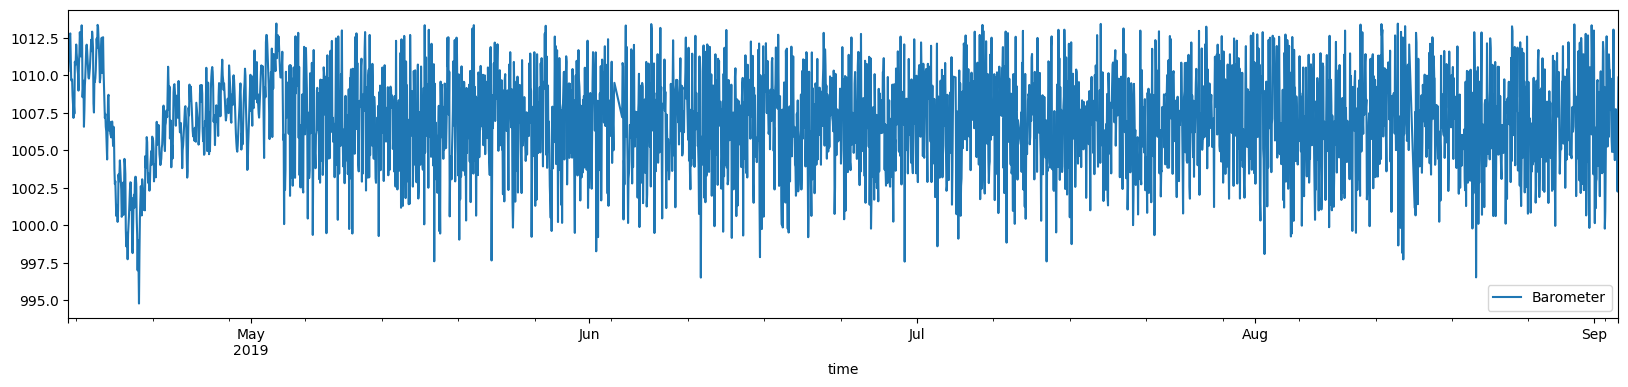

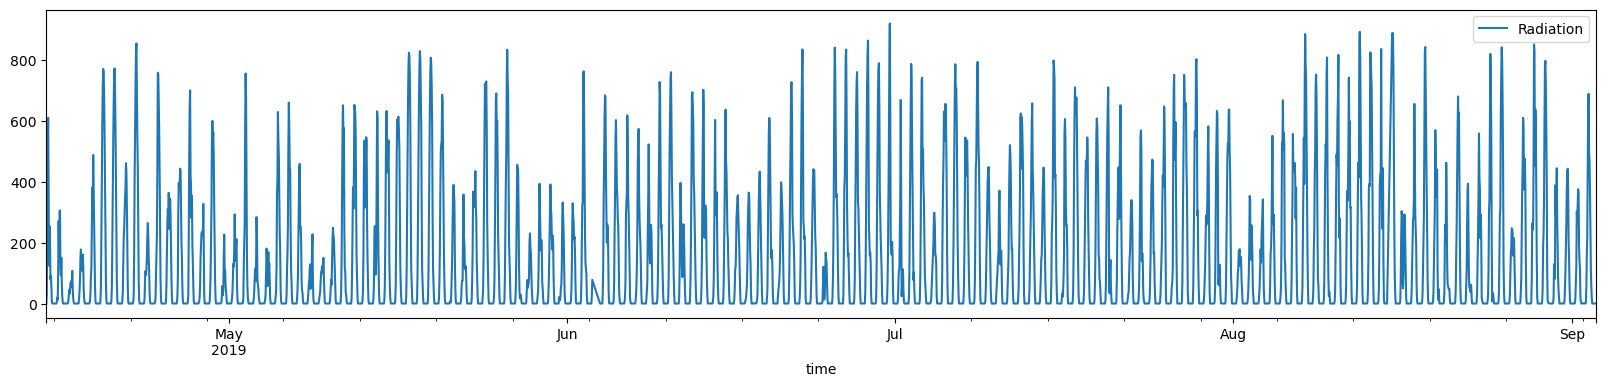

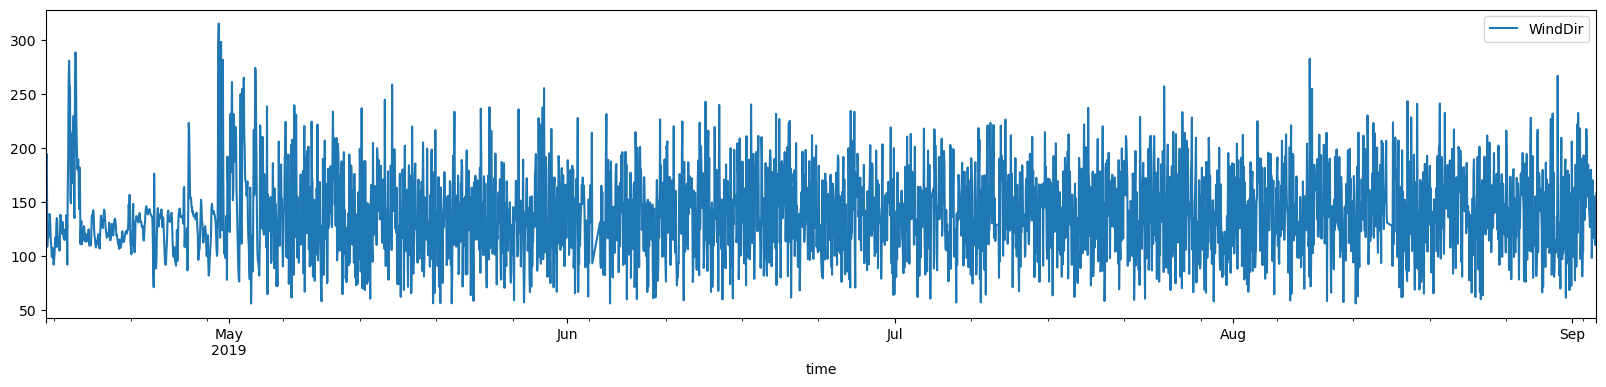

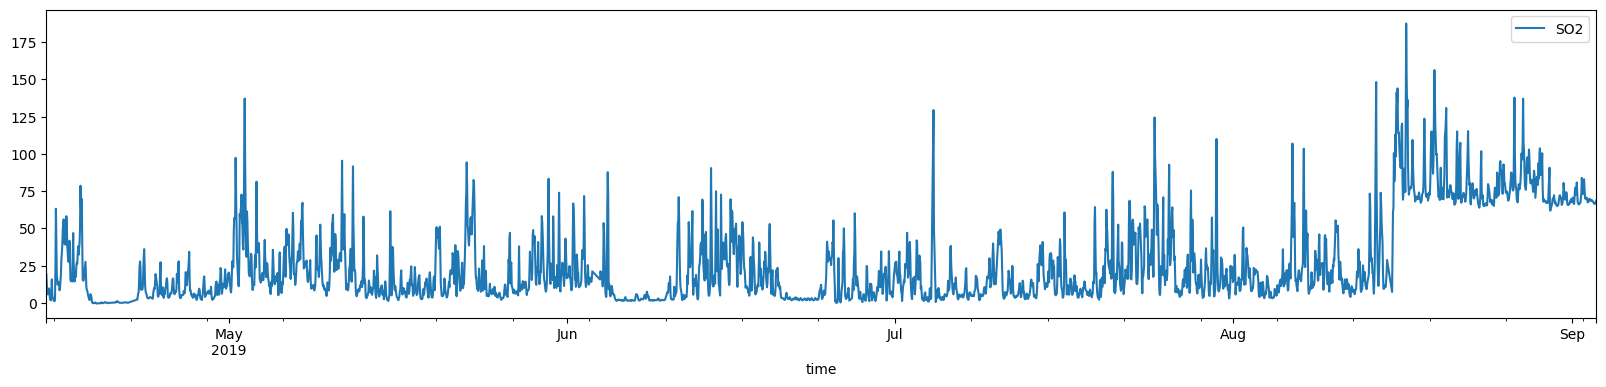

In [16]:
dataFrame[['Barometer']].plot(figsize=(20,4))
dataFrame[['Radiation']].plot(figsize=(20,4))
dataFrame[['WindDir']].plot(figsize=(20,4))
dataFrame[['SO2']].plot(figsize=(20,4))

In [17]:
len = 120
step = 48



In [18]:
resSarima = []
resSarima.append(AutoArima(dataFrame['Barometer'].tail(len)))
resSarima.append(AutoArima(dataFrame['Radiation'].tail(len)))
resSarima.append(AutoArima(dataFrame['WindDir'].tail(len)))
resSarima.append(AutoArima(dataFrame['SO2'].tail(len)))

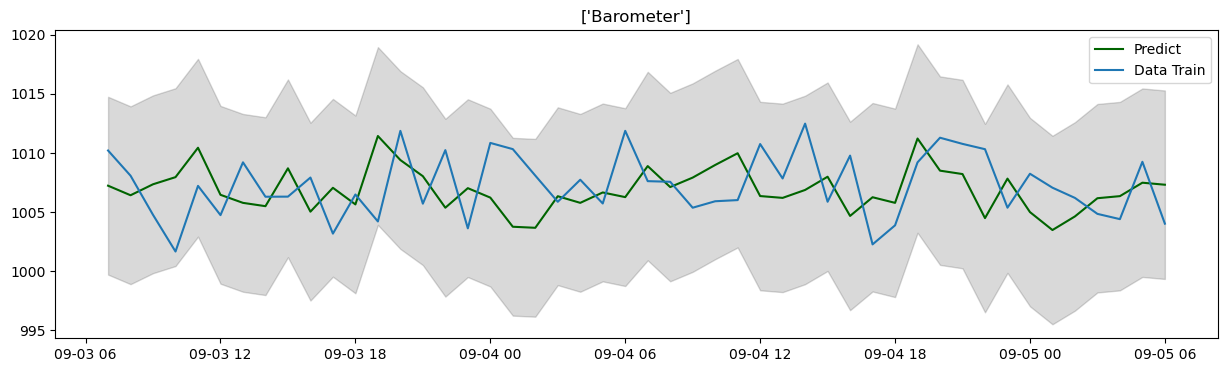

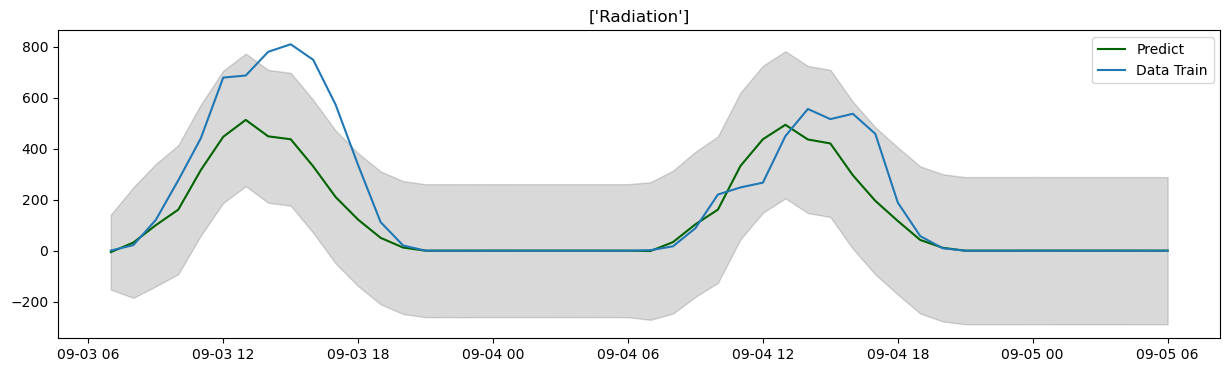

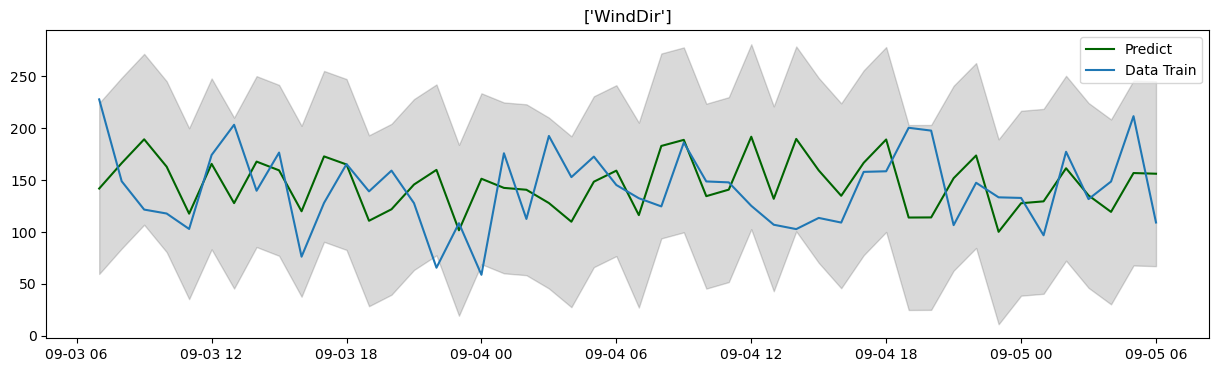

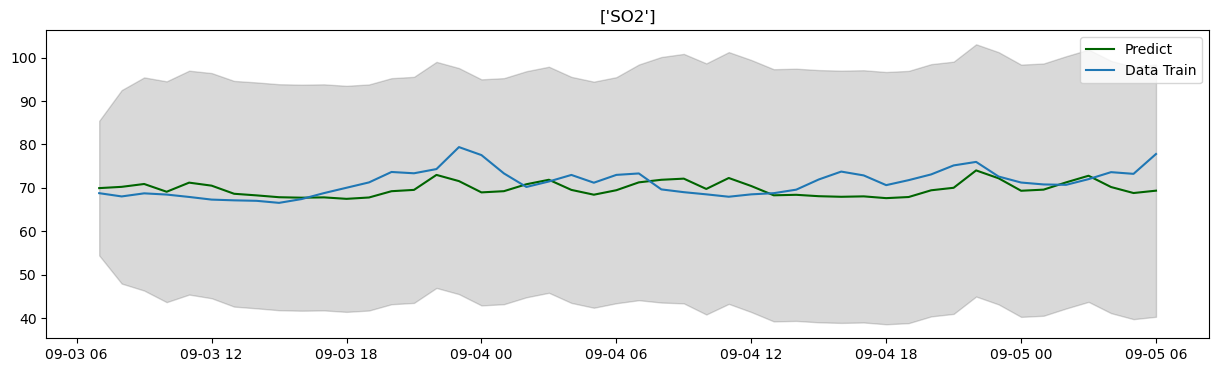

In [39]:
predict = []
res = Forecast(resSarima[0])
Plot(res, testSet01[['Barometer']])
predict.append(res[0])

res = Forecast(resSarima[1])
Plot(res, testSet01[['Radiation']])
predict.append(res[0])

res = Forecast(resSarima[2])
Plot(res, testSet01[['WindDir']])
predict.append(res[0])

res = Forecast(resSarima[3])
Plot(res, testSet01[['SO2']])
predict.append(res[0])

# Sheet 4 Last Column

In [40]:
#Read Mono Series
dataFrame02 = pd.read_excel("../data/DataAirTrain.xlsx",index_col=0,sheet_name="fourLastColumn")
dataFrame02 = dataFrame02.resample('H').interpolate(method='linear')

In [41]:
dataFrame02.tail(10)

,Hướng gió,Nhiệt độ,Áp suất khí quyển,Wind Spd (sai)
time,,,,
2019-09-04 21:00:00,134.38,30.70,1000.94,1.84
2019-09-04 22:00:00,77.56,31.06,1002.75,2.76
2019-09-04 23:00:00,79.66,31.05,1003.10,3.44
2019-09-05 00:00:00,71.28,30.79,1002.13,2.98
2019-09-05 01:00:00,73.57,30.72,1001.96,3.02
2019-09-05 02:00:00,103.96,30.69,1002.97,2.46
2019-09-05 03:00:00,84.25,30.64,1002.61,2.57
2019-09-05 04:00:00,74.20,30.63,1002.26,3.08
2019-09-05 05:00:00,91.78,30.46,1002.10,2.75


In [42]:
trainSet = dataFrame02[: -48]
testSet02 = dataFrame02[-48: ]
dataFrameCopy02 = dataFrame02
dataFrame02 = trainSet

In [43]:
len = 120
step = 48

In [44]:
resSarima.append(AutoArima(dataFrame02['Hướng gió'].tail(len)))
resSarima.append(AutoArima(dataFrame02['Nhiệt độ'].tail(len)))
resSarima.append(AutoArima(dataFrame02['Áp suất khí quyển'].tail(len)))
resSarima.append(AutoArima(dataFrame02['Wind Spd (sai)'].tail(len)))

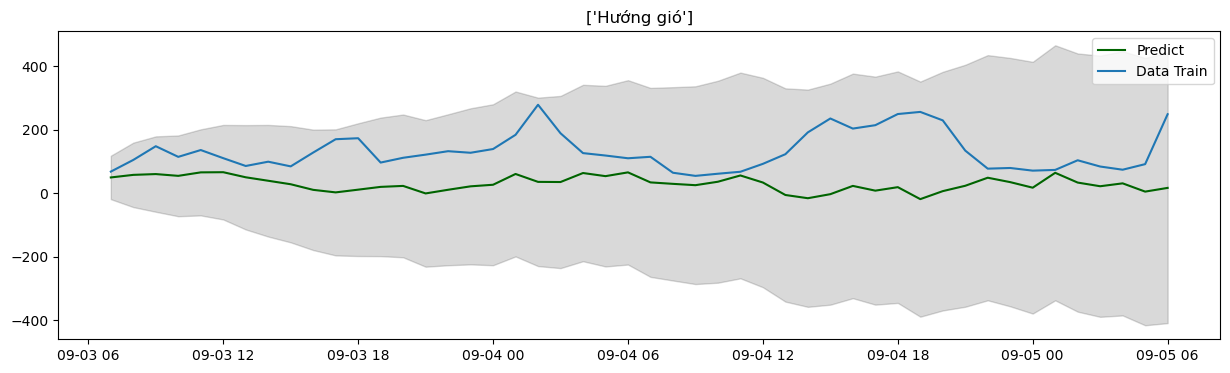

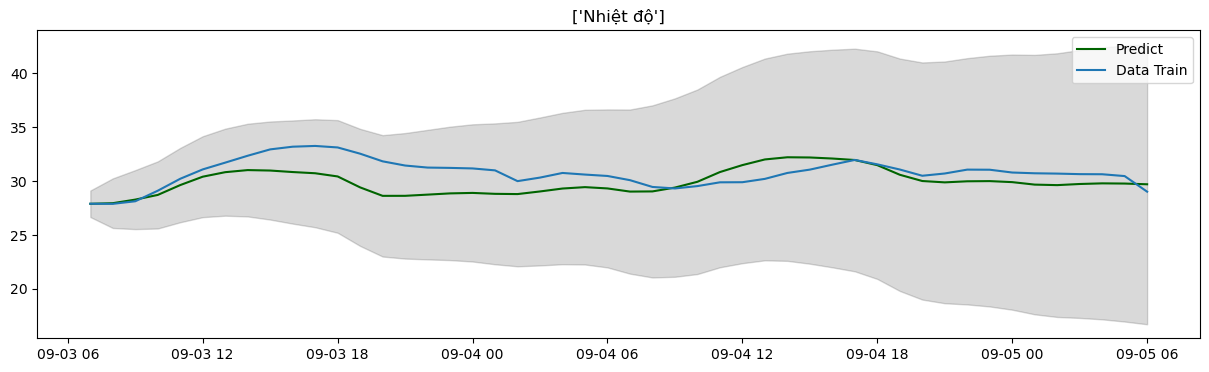

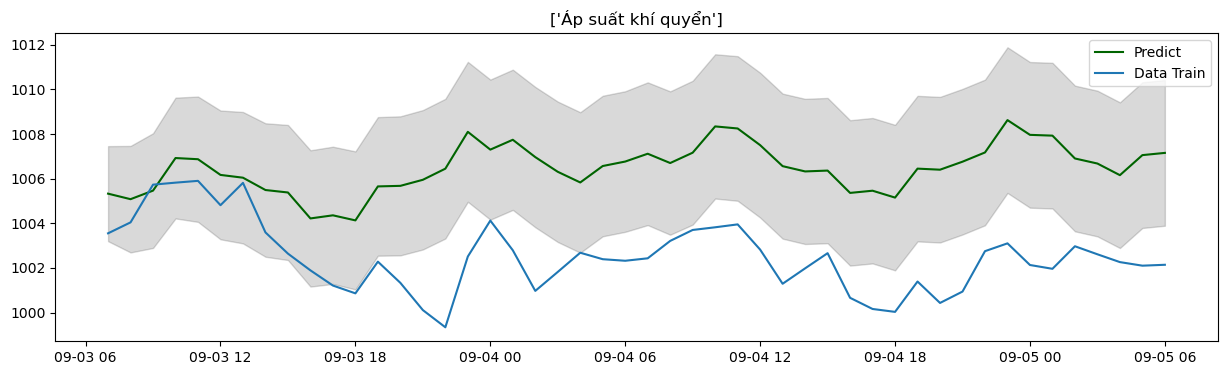

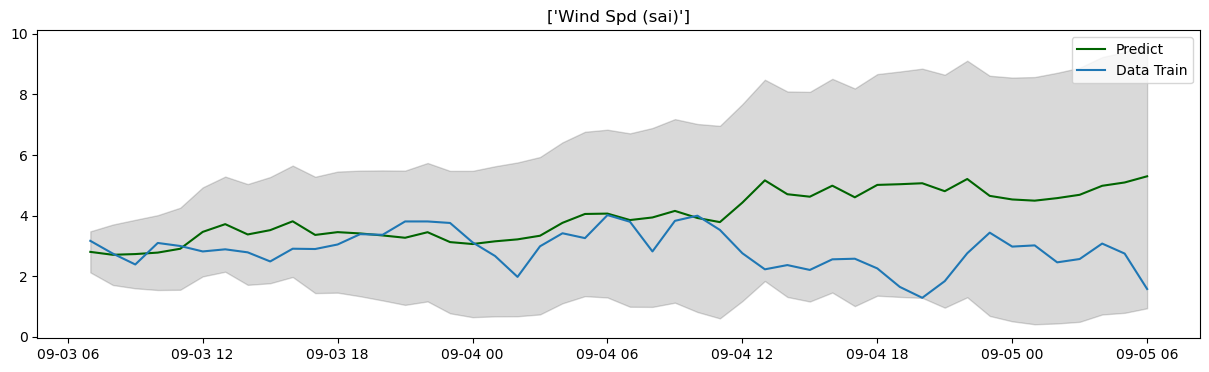

In [45]:
res = Forecast(resSarima[4])
Plot(res, testSet02[['Hướng gió']])
predict.append(res[0])

res = Forecast(resSarima[5])
Plot(res, testSet02[['Nhiệt độ']])
predict.append(res[0])

res = Forecast(resSarima[6])
Plot(res, testSet02[['Áp suất khí quyển']])
predict.append(res[0])

res = Forecast(resSarima[7])
Plot(res, testSet02[['Wind Spd (sai)']])
predict.append(res[0])

In [46]:
dateTimeIndex = pd.date_range(dataFrame.index[-1] + pd.DateOffset(hours=1), periods=step, freq="H")
idx = pd.Index(dateTimeIndex, name='time')
dataFramePredicted = pd.DataFrame(predict)
dataFramePredicted = dataFramePredicted.transpose()
dataFramePredicted.index = idx
dataFramePredicted.columns = ["Barometer","Radiation","WindDir","SO2","Hướng gió","Nhiệt độ","Áp suất khí quyển","Wind Spd (sai)"]


In [47]:
tmp = []
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,0], testSet01.iloc[:,0]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,1], testSet01.iloc[:,1]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,2], testSet01.iloc[:,2]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,3], testSet01.iloc[:,3]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,4], testSet02.iloc[:,0]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,5], testSet02.iloc[:,1]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,6], testSet02.iloc[:,2]))
tmp.append(forecast_accuracy(dataFramePredicted.iloc[:,7], testSet02.iloc[:,3]))
metric = pd.DataFrame(tmp, index=dataFramePredicted.columns.values)
print(metric)

                       mape          me         mae       mpe        rmse  \
Barometer          0.003019   -0.359820    3.041343 -0.000349    3.456968   
Radiation               inf  -61.760492   76.086772       NaN  138.088982   
WindDir            0.301864    5.050238   37.160255  0.122875   45.642552   
SO2                0.038690   -1.463571    2.806600 -0.019034    3.447457   
Hướng gió          0.701153 -102.462623  102.462623 -0.701153  124.607413   
Nhiệt độ           0.038682   -0.839042    1.209444 -0.026415    1.481428   
Áp suất khí quyển  0.003966    3.963145    3.974263  0.003955    4.292601   
Wind Spd (sai)     0.537056    1.112531    1.216361  0.507547    1.632754   

                       corr    minmax  
Barometer         -0.130854  0.003014  
Radiation          0.912857       inf  
WindDir           -0.026630  0.221023  
SO2                0.186784  0.038355  
Hướng gió         -0.406796  0.701153  
Nhiệt độ           0.466343  0.038442  
Áp suất khí quyển  0.23028